In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.rcParams['axes.labelpad'] = 15
plt.rcParams.update({'font.size': 16})

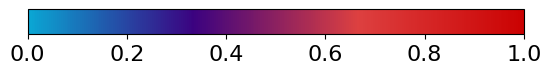

In [44]:
# Define the colors
start_color = "#0AA7D4"
middle_color = "#3B0280"
end_color = "#DD4040"
end_end_color = "#CB0202"

num_colors = 10

# Create the gradient list of colors
gradient = mcolors.LinearSegmentedColormap.from_list("custom_gradient", [start_color, middle_color, end_color, end_end_color], N=num_colors)
gradient_colors = [mcolors.rgb2hex(gradient(i/num_colors)) for i in range(num_colors)]

# Create a colormap
nml_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", gradient_colors)

# Display the colormap
plt.imshow([[0,1]], aspect='auto', cmap=nml_cmap)
plt.gca().set_visible(False)
plt.colorbar(cmap=nml_cmap, orientation="horizontal")
plt.show()

[*********************100%***********************]  5 of 5 completed


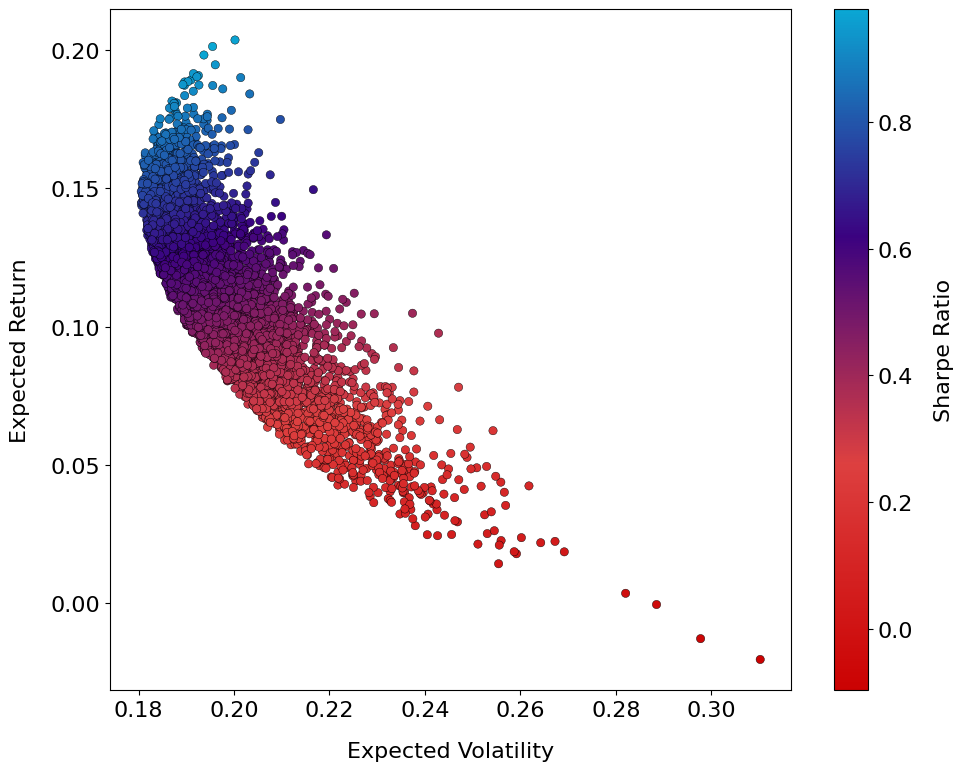

In [72]:
import yfinance as yf
import numpy as np

# Step 1: Download historical price data
tickers = ['AAPL', 'GM', 'AAL', 'CCL', 'A']
data = yf.download(tickers, start='2015-01-01', end='2019-12-31')['Adj Close']

# Step 2: Calculate daily returns
returns = data.pct_change().dropna()

# Step 3: Calculate mean returns and covariance matrix
mean_returns = returns.mean() * 252  # Annualize returns
cov_matrix = returns.cov() * 252  # Annualize covariance

# Step 4: Simulate random portfolios
n_portfolios = 5000
results = np.zeros((n_portfolios, 3))  # Columns: return, volatility, Sharpe ratio
weights_record = []

for i in range(n_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)  # Normalize weights to sum to 1
    portfolio_return = np.sum(weights * mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - 0.01) / portfolio_volatility  # Assume risk-free rate of 3%
    results[i] = [portfolio_return, portfolio_volatility, sharpe_ratio]
    weights_record.append(weights)

# Step 5: Plot the efficient frontier
plt.figure(figsize=(10, 8))
scatter = plt.scatter(results[:, 1], results[:, 0], c=results[:, 2], cmap=nml_cmap.reversed(), edgecolors='black', linewidths=0.3)
plt.colorbar(scatter, label='Sharpe Ratio')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
# plt.title('Efficient Frontier for AAPL, GM, AAL, CCL, A')
plt.tight_layout()
plt.savefig('plots/Sharpe_Ratio_Efficient_Frontier.png', dpi=300)
plt.show()


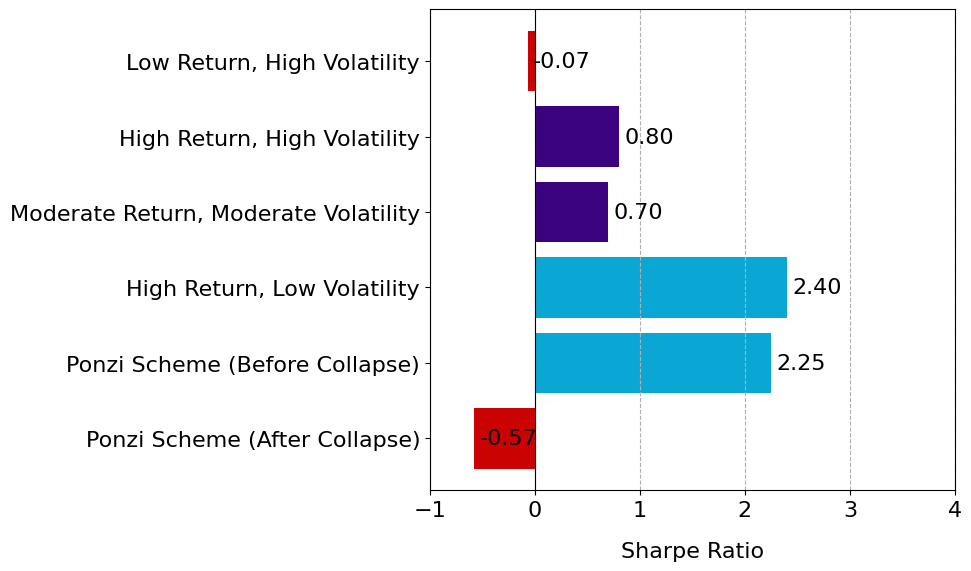

In [70]:
# Function to calculate Sharpe Ratio
def sharpe_ratio(returns, risk_free_rate, volatility):
    return (returns - risk_free_rate) / volatility

# Data for different scenarios
scenarios = [
    {"name": "Ponzi Scheme (After Collapse)", "return": -0.20, "volatility": 0.40},  # Sharpe Ratio ~ -0.6
    {"name": "Ponzi Scheme (Before Collapse)", "return": 0.12, "volatility": 0.04},  # Sharpe Ratio ~ 3.0
    {"name": "High Return, Low Volatility", "return": 0.15, "volatility": 0.05},  # Sharpe Ratio ~ 2.0
    {"name": "Moderate Return, Moderate Volatility", "return": 0.10, "volatility": 0.10},  # Sharpe Ratio ~ 1.0
    {"name": "High Return, High Volatility", "return": 0.15, "volatility": 0.15},  # Sharpe Ratio ~ 1.0
    {"name": "Low Return, High Volatility", "return": 0.02, "volatility": 0.15},  # Sharpe Ratio ~ 0.0
]

# Risk-free rate
risk_free_rate = 0.03

# Calculate Sharpe Ratios for each scenario
sharpe_ratios = [sharpe_ratio(s["return"], risk_free_rate, s["volatility"]) for s in scenarios]

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.barh([s["name"] for s in scenarios], sharpe_ratios, color=[end_end_color, start_color, start_color, middle_color, middle_color, end_end_color])

# Add data labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')

plt.xlabel('Sharpe Ratio')
# plt.title('Sharpe Ratio Across Different Scenarios')
plt.xlim([-1, 4])
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(True, axis='x', linestyle='--')

# Display the plot
plt.tight_layout()
plt.savefig('plots/Sharpe_Ratio_Different_Scenarios.png', dpi=300)
plt.show()
